Task 4.10 - Part 1A

This script contains the following points:

1. Importing libraries and data 
2. Removing PII data from database
3. Creating regional segmentation of data
4. Determining spending habits of each region
5. Excluding low-activity customers
6. Exporting dataframe

1. Importing libraries and data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\polly\Documents\Instacart Basket Analysis'
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))  

In [3]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
# Check shape of dataframe
df_ords_prods_all.shape

(32404859, 33)

In [5]:
# Check statistics of dataframe
df_ords_prods_all.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,number_of_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,32404859.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404859.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,6.449111e+01,9.919792e+00,7.566404e+00,3.305217e+01,1.004174e+01,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,4.843815e+01,6.281485e+00,4.110642e+00,2.515525e+01,8.321326e+01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387299e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.0,2.530200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,7.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,12.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500543e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


2. Removing PII data from database

In [6]:
# Remove first_name and surname columns from database
df_ords_prods_all = df_ords_prods_all.drop(columns = ['first_name', 'surname'])

In [7]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


3. Creating regional segmentation of data

In [8]:
# Create regions based on state
result = []

for value in df_ords_prods_all['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append('Northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append('Midwest')
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append('South')   
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append('West')
  else:
    result.append('Undefined Region')

In [9]:
# Create new column 'region' and set to 'result'
df_ords_prods_all['region'] = result

In [10]:
# Print frequency of 'region' column
df_ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

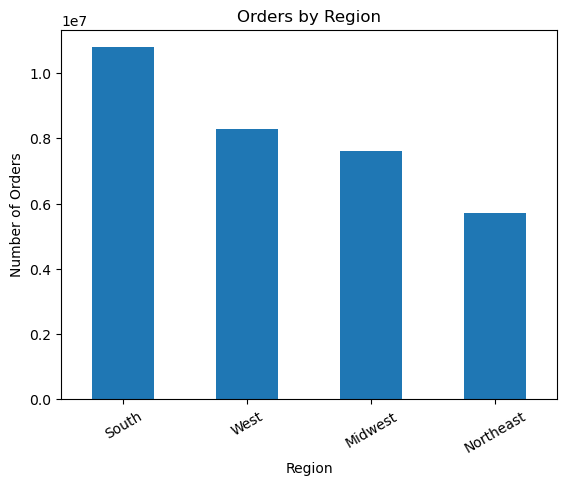

In [11]:
# Create bar chart for 'region' distribution
bar = df_ords_prods_all['region'].value_counts().plot.bar()
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.title('Orders by Region')
plt.xticks(rotation = 30)


In [12]:
# Save 'bar' object to file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_frequency.png'))

In [13]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge,region
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


4. Determining spending habits of each region

In [14]:
# Create crosstab between 'region' and 'spending_flag' columns
crosstab_1 = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], dropna = False)

In [15]:
# Print crosstab
crosstab_1

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [16]:
# Create percentage crosstab between 'region' and 'spending_flag' columns
crosstab_2 = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], normalize = 'index', dropna = False).round(4)*100

In [17]:
# Print crosstab
crosstab_2

spending_flag,High spender,Low spender
region,,
Midwest,2.05,97.95
Northeast,1.89,98.11
South,1.94,98.06
West,1.93,98.07


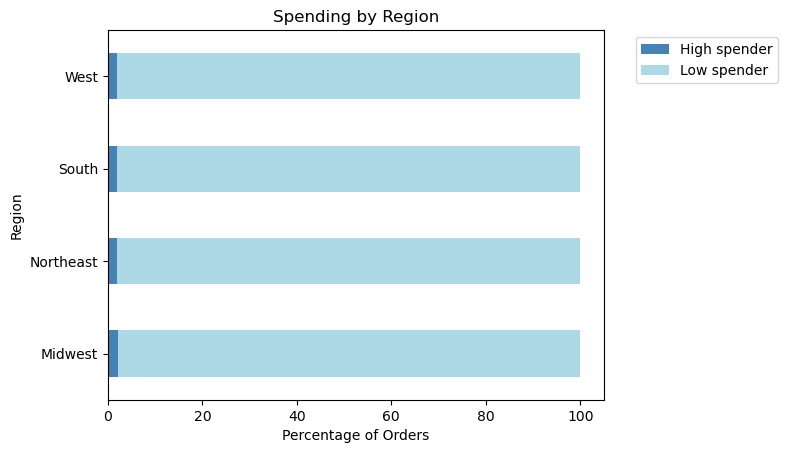

In [18]:
# Create stacked horizontal bar chart based on percentages
bar_2 = crosstab_2.plot(kind = 'barh', stacked = True, color = ['steelblue', 'lightblue'])
plt.xlabel('Percentage of Orders')
plt.ylabel('Region')
plt.title('Spending by Region')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', ncol = 1)

In [19]:
# Save 'bar_2' object to file
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_region_spend_percentage.png'))

5. Excluding low-activity customers

In [20]:
# Create 'activity_flag' column based on existing 'max_order' column value for each user 

In [21]:
df_ords_prods_all.loc[df_ords_prods_all['max_order'] >= 5, 'activity_flag'] = 'Active customer'

In [22]:
df_ords_prods_all.loc[df_ords_prods_all['max_order']< 5, 'activity_flag'] = 'Low-activity customer'

In [23]:
# Check output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active customer


In [24]:
# Print frequency of 'activity_flag' column
df_ords_prods_all['activity_flag'].value_counts(dropna = False)

Active customer          30964564
Low-activity customer     1440295
Name: activity_flag, dtype: int64

In [ ]:
# Create new dataframe df_ords_prods_exclude that excludes 'Low-activity customers'
df_ords_prods_exclude = df_ords_prods_all.loc[df_ords_prods_all['activity_flag'] == 'Active customer']

In [ ]:
# Check size of df_ords_prods_exclude
df_ords_prods_exclude.shape

In [ ]:
# Check frequency of 'activity_flag' column in df_ords_prods_exclude
df_ords_prods_exclude['activity_flag'].value_counts(dropna = False)

6. Exporting dataframe

In [ ]:
# Export df_ords_prods_exclude to 'Prepared Data' folder
df_ords_prods_exclude.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_low_excluded.pkl'))